## This file should be pasted in Yolo directory to access the val.py file 
## Change The following lines in val.py file
### Add posix Path
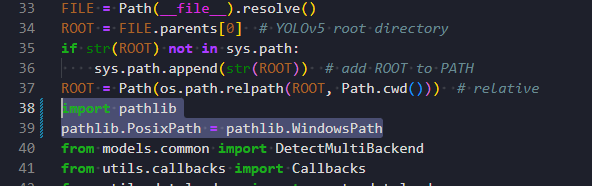
<br>
## Add the following imports

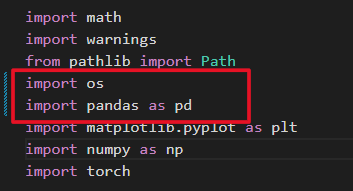
<br>
## change the highlighted lines in metrics.py file
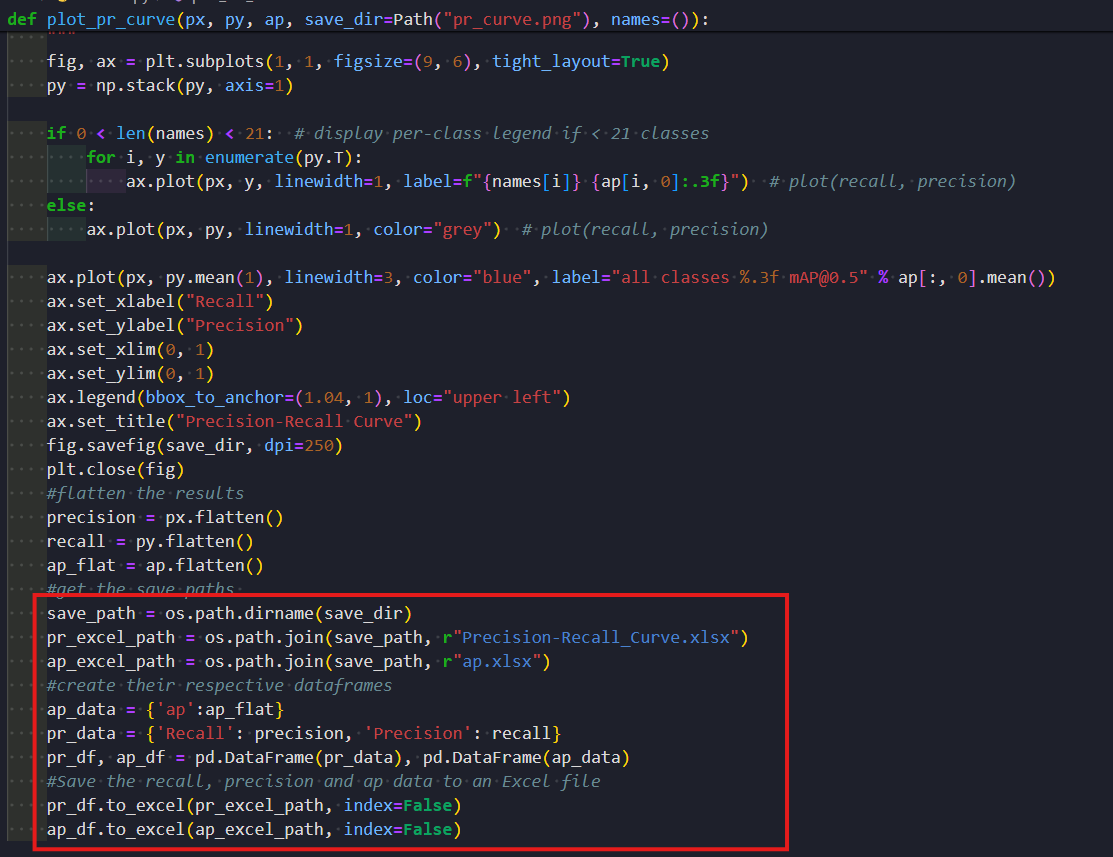

<br>#flatten the results
<br>precision = px.flatten()
<br>recall = py.flatten()
<br>ap_flat = ap.flatten()
<br>#get the save paths 
<br>save_path = os.path.dirname(save_dir)
<br>pr_excel_path = os.path.join(save_path, r"Precision-Recall_Curve.xlsx")
<br>ap_excel_path = os.path.join(save_path, r"ap.xlsx")
<br>#create their respective dataframes
<br>ap_data = {'ap':ap_flat}
<br>pr_data = {'Recall': precision, 'Precision': recall}
<br>pr_df, ap_df = pd.DataFrame(pr_data), pd.DataFrame(ap_data)
<br>#Save the recall, precision and ap data to an Excel file
<br>pr_df.to_excel(pr_excel_path, index=False)
<br>ap_df.to_excel(ap_excel_path, index=False)

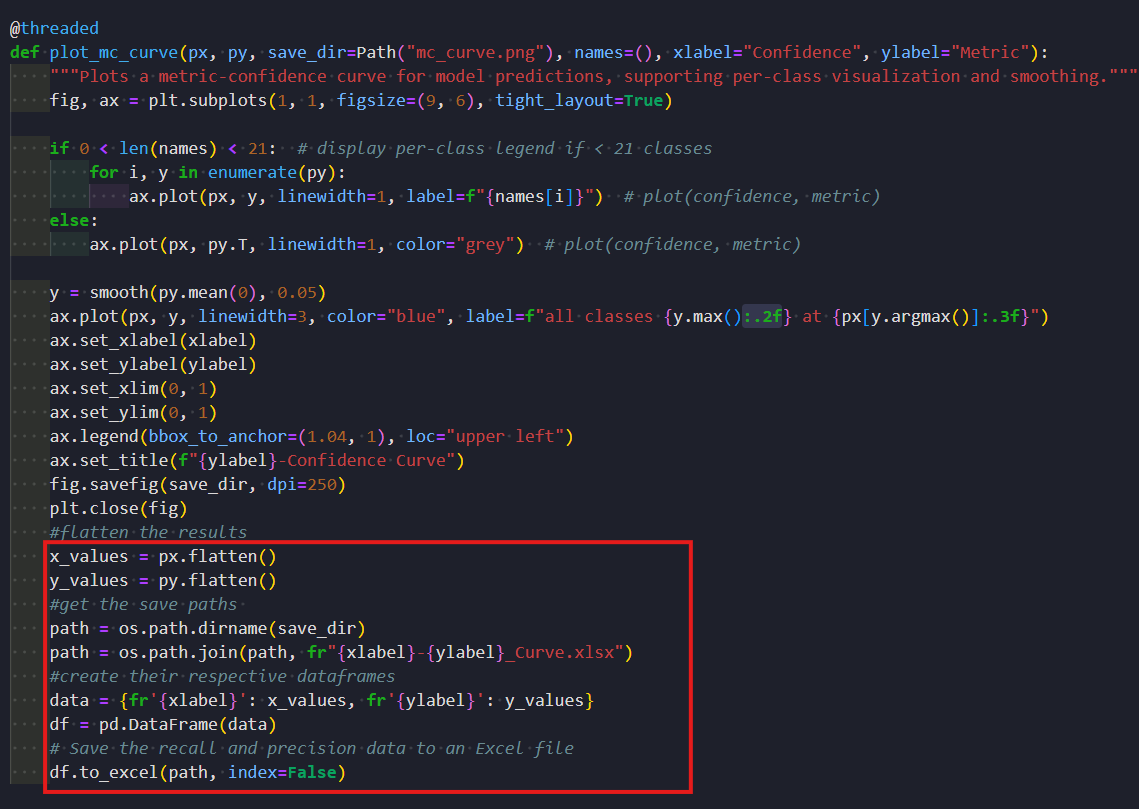

<br>#flatten the results
<br>x_values = px.flatten()
<br>y_values = py.flatten()
<br>#get the save paths 
<br>path = os.path.dirname(save_dir)
<br>path = os.path.join(path, fr"{xlabel}-{ylabel}_Curve.xlsx")
<br>#create their respective dataframes
<br>data = {fr'{xlabel}': x_values, fr'{ylabel}': y_values}
<br>df = pd.DataFrame(data)
<br>#Save the recall and precision data to an Excel file
<br>df.to_excel(path, index=False)

## Install the required libraries
### PyYaml
This library is used for Yaml file manipulation
### openpyxl
This library is used for excel file manipulation

In [1]:
%pip install PyYAML
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Akash\Work\AI\model_evaluation\evaluation\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Akash\Work\AI\model_evaluation\evaluation\Scripts\python.exe -m pip install --upgrade pip' command.


## Change current to inside of YOLOv5 directory

In [2]:
%cd "D:\Akash\Work\AI\model_evaluation\yolov5\"

D:\Akash\Work\AI\model_evaluation\yolov5


Just add the path for your datasets in the extracted data set dictionary ans save path for where you want to save the data

In [3]:
import os
import yaml
import logging
import pandas as pd
from openpyxl import load_workbook
from importlib import reload
import argparse
import val
# def copy_image_file()
reload(logging)

# Configure logging again with the desired level and format
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s: %(message)s')

class YamlFile:
    def __init__(self, path = os.getcwd()):
        self.create_Yaml(path)
        
    def create_Yaml(self, path):
        file_name = r"test.yaml"
        self.yaml_path = os.path.join(path, file_name)
        data = {
        'path': 'E:\\Evaluation_data_creation\\raw_test\\val_raw_root',  # dataset root dir
        'train': 'images',  # train images (relative to 'path') 128 images
        'val': 'images',    # val images (relative to 'path') 128 images
        'test': 'images',   # test images (optional)
        'names': {
            0: 'person'
            }
        }
        self.write_yaml(data, self.yaml_path)
        logging.info(fr"Yaml file created at {path} with name : {file_name}")
        pass
    def write_yaml(self, data, file_path):
        with open(file_path, 'w') as file:
            yaml.safe_dump(data, file, default_flow_style=False, sort_keys=False)   
    def read_yaml(self, file_path):
        with open(file_path, 'r') as file:
            data = yaml.safe_load(file)
        return data
    def change_yaml_file(self, new_path, new_val = r'images', new_test = r'images'):
        # Read the YAML file
        data = self.read_yaml(self.yaml_path)

        # Modify the 'path', 'val', and 'test' keys
        data['path'] = new_path
        data['val'] = new_val
        data['test'] = new_test

        # Write the modified data back to the YAML file
        self.write_yaml(data, self.yaml_path)
        # print("Modified Data:", data)


class ExcelFile:
    headers = ['Model name', 'FP', 'FN', 'TP']

    def __init__(self, path, sheets_names):
        self.create_excel_file(path, sheets_names)

    def create_excel_file(self, path, sheets_names):
        self.excel_path = os.path.join(path, 'results.xlsx')
        self.writer = pd.ExcelWriter(self.excel_path, engine='openpyxl')
        for sheet_name in sheets_names:
            df = pd.DataFrame(columns=ExcelFile.headers)
            df.to_excel(self.writer, sheet_name=sheet_name, index=False)
        self.writer.close()

    def add_data_to_sheet(self, sheet_name, data):
        book = load_workbook(self.excel_path)
        with pd.ExcelWriter(self.excel_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
            writer._book = book
            writer._sheets = {ws.title: ws for ws in book.worksheets}

            # Ensure data is in the correct format (as a list of dictionaries for each row)
            data_dict = [{ExcelFile.headers[i]: val for i, val in enumerate(data)}]
            df = pd.DataFrame(data_dict)

            start_row = book[sheet_name].max_row if book[sheet_name].max_row > 1 else 0
            df.to_excel(writer, sheet_name=sheet_name, index=False, header=False if start_row else True, startrow=start_row)

def find_number_of_instances(path):
    file_extension='.txt'
    labels_path = os.path.join(path, 'labels')
    total_lines = 0
    file_counts = {}  # To store line count for each file
    
    # List all files in the directory with the specified extension
    files = [f for f in os.listdir(labels_path) if f.endswith(file_extension) and f != 'classes.txt']
    
    # Loop through the files and count the lines
    for filename in files:
        
        filepath = os.path.join(labels_path, filename)
        
        with open(filepath, 'r') as file:
            line_count = sum(1 for line in file if line.strip())
            file_counts[filename] = line_count
            total_lines += line_count

    return total_lines
def find_number_of_background_instances(path):
    image_files = set([file for file in os.listdir(os.path.join(path, r"images")) if file.endswith(('.jpg'))])
    label_files = set([file for file in os.listdir(os.path.join(path, r"labels")) if file.endswith('.txt') and file != 'classes.txt'])
    return len(image_files) - len(label_files)
def create_config(weights_path,data_path, project_path, name):
    # Creating an argparse.Namespace manually
    opt = argparse.Namespace(
        data=data_path,
        weights=weights_path,
        batch_size=32,
        imgsz=640,
        conf_thres=0.001,
        iou_thres=0.6,
        max_det=300,
        task="val",
        device="",
        workers=8,
        single_cls=False,
        augment=False,
        verbose=False,
        save_txt=False,
        save_hybrid=False,
        save_conf=False,
        save_json=False,
        project=project_path,
        name=name,
        exist_ok=False,
        half=False,
        dnn=False
    )
    return opt
def main(save_path, extracted_dataset,models):
    yaml_file = YamlFile(save_path)
    # excel_file = ExcelFile(save_path, extracted_dataset.keys())
    for dataset_name, data_path in extracted_dataset.items():
        yaml_file.change_yaml_file(data_path)
        project_path = os.path.join(save_path, dataset_name)
        # number_of_instances = find_number_of_instances(data_path)
        # number_of_background_instances = find_number_of_background_instances(data_path)
        # print(dataset_name,number_of_background_instances)
        for model_name, model_path in models.items():
            opt = create_config(weights_path=model_path,data_path=yaml_file.yaml_path,project_path= project_path, name=model_name)

            # Call the main function with the configuration object
            val.main(opt)
            
            # fn = number_of_instances - tp[0]
            # tn = number_of_background_instances + number_of_instances - tp[0] - fn
            # data = [model_name, fp[0],fn , tp[0]]
            # excel_file.add_data_to_sheet(dataset_name, data)



In [5]:
import os

def list_files(directory):
    # List all files and directories in the specified directory
    paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Append the file path to the list
            paths.append(os.path.join(root, file))
    return paths

# Specify the directory path
directory_path = r"D:\Akash\Work\AI\error_analysis_BG\model"

# Get all file paths
file_paths = list_files(directory_path)
models={}
# print(file_paths)
for x in file_paths:
   models[os.path.basename(x)[:-3]] = x

len(models.keys())

1

## Change the parameters

In [4]:
#The paths to the pt file of all the 11 models 
# models = {
#     r"240802190851_runs_train_2024_07_tc1_dataset_1": r"D:\Akash\Work\AI\202407_tc1\Model\pt_files\240802190851_runs_train_2024_07_tc1_dataset_1.pt",
#     r"240802155441_runs_train_2024_07_tc1_dataset_2": r"D:\Akash\Work\AI\202407_tc1\Model\pt_files\240802155441_runs_train_2024_07_tc1_dataset_2.pt",
#     r"240804072621_runs_train_2024_07_tc1_dataset_3": r"D:\Akash\Work\AI\202407_tc1\Model\pt_files\240804072621_runs_train_2024_07_tc1_dataset_3.pt",  
# }


In [8]:
'''
name of the dataset and path , The folder structure should be 
-raw_test_5
    --->images
        --->000000.jpg
    --->labels
        --->000000.txt
'''
extracted_dataset_paths = {
    "結合データセット":                         r"D:\Akash\Work\AI\test_data\datasets\test_data",
    "ぼやけされている人":                   r"D:\Akash\Work\AI\test_data\datasets\cases\ぼやけされている人",
    "運転している":                         r"D:\Akash\Work\AI\test_data\datasets\cases\運転している",
    "顔が見えない運転者の画像":              r"D:\Akash\Work\AI\test_data\datasets\cases\顔が見えない運転者の画像",
    "屈んでいるポーズ":                     r"D:\Akash\Work\AI\test_data\datasets\cases\屈んでいるポーズ",
    "座っているポーズ":                     r"D:\Akash\Work\AI\test_data\datasets\cases\座っているポーズ",
    "遮蔽されている人":                     r"D:\Akash\Work\AI\test_data\datasets\cases\遮蔽されている人",
    "体の部分":                            r"D:\Akash\Work\AI\test_data\datasets\cases\体の部分",
    "特徴がよくみえない画像":               r"D:\Akash\Work\AI\test_data\datasets\cases\特徴がよくみえない画像",
    # "背景":                                r"D:\Akash\Work\AI\test_data\datasets\cases\背景",
    "箱を持っている·運んでいるポーズ":       r"D:\Akash\Work\AI\test_data\datasets\cases\箱を持っている·運んでいるポーズ",
    "立っているポーズ":                     r"D:\Akash\Work\AI\test_data\datasets\cases\立っているポーズ",
}

# extracted_dataset_paths={}
# def createdic(root_folder_path,):
#     for name in os.listdir(root_folder_path):
#         testDataPath= os.path.join(root_folder_path,name)
#         extracted_dataset_paths[name] = testDataPath
#     for k,v in extracted_dataset_paths.items():
#      print(k,":",v)

# Test_Data_Path= r"D:\Akash\Work\AI\New_similarity_range_analysis\Test_evaluate" #Add all the test data into a single folder and provide the path (Include 結合andケースごと in same folder)
# createdic(Test_Data_Path)

In [6]:
# path to save the results  
save_path = r"D:\Akash\Work\AI\202407_tc1\val"

In [9]:
main(save_path, extracted_dataset_paths, models)

2024-08-05 13:14:36,684 - INFO: Yaml file created at D:\Akash\Work\AI\202407_tc1\val with name : test.yaml
YOLOv5  2024-8-5 Python-3.8.10 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning D:\Akash\Work\AI\test_data\datasets\test_data\labels... 14024 images, 3282 backgrounds, 0 corrupt: 100%|██████████| 17306/17306 [00:12<00:00, 1390.10it/s]
val: WARNING  Cache directory D:\Akash\Work\AI\test_data\datasets\test_data is not writeable: [WinError 183] Cannot create a file when that file already exists: 'D:\\Akash\\Work\\AI\\test_data\\datasets\\test_data\\labels.cache.npy' -> 'D:\\Akash\\Work\\AI\\test_data\\datasets\\test_data\\labels.cache'
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 541/541 [04:34<00:00,  1.97it/s]
                   all      17306      16591      0.889      0.712      0.816      0.597
Speed: 0.